In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import itertools
from scipy.stats import randint
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from category_encoders import CatBoostEncoder
from tensorflow.keras.layers import LeakyReLU
warnings.filterwarnings("ignore")

In [48]:
train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [49]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [50]:
quantitative = train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]

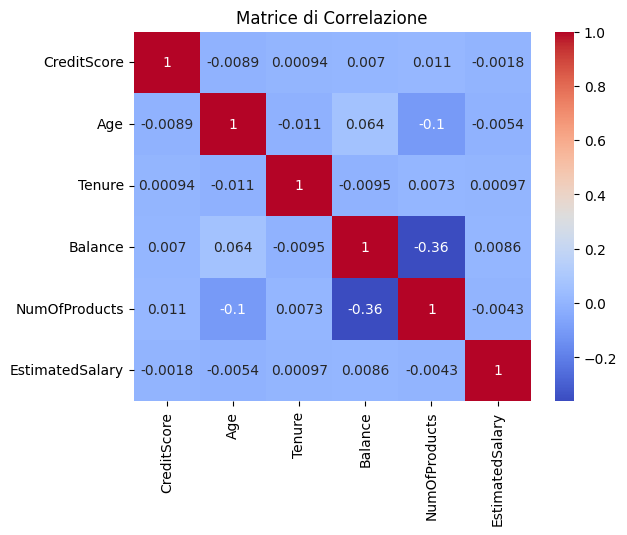

In [51]:
# Calcolo della matrice di correlazione

corr_matrix = quantitative.corr()

# Creazione della heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
# Calcolare la media di EstimatedSalary per ciascuna categoria in Exited
mean_salaries = train.groupby('Exited')['EstimatedSalary'].mean().reset_index()
print(mean_salaries)
# Creazione del grafico a barre
sns.barplot(x='Exited', y='EstimatedSalary', data=mean_salaries)
plt.title('Media di EstimatedSalary per Categoria di Exited')
plt.xlabel('Exited')
plt.ylabel('Media di EstimatedSalary')
plt.show()

   Exited  EstimatedSalary
0       0    112084.293725
1       1    114402.496656


In [ ]:
# Separare i dati in base ai gruppi
group0 = train[train['Exited'] == 0]['EstimatedSalary']
group1 = train[train['Exited'] == 1]['EstimatedSalary']

# Eseguire il test t
t_stat, p_value = stats.ttest_ind(group0, group1)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


   Exited  NumOfProducts
0       0       1.615273
1       1       1.327854


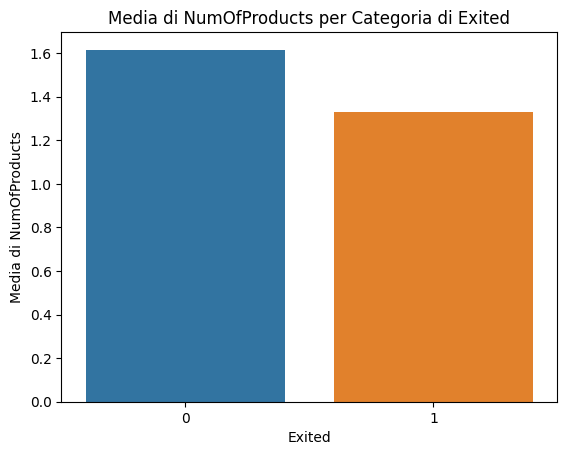

In [ ]:
# Calcolare la media di EstimatedSalary per ciascuna categoria in Exited
mean_nofprod = train.groupby('Exited')['NumOfProducts'].mean().reset_index()
print(mean_nofprod)
# Creazione del grafico a barre
sns.barplot(x='Exited', y='NumOfProducts', data=mean_nofprod)
plt.title('Media di NumOfProducts per Categoria di Exited')
plt.xlabel('Exited')
plt.ylabel('Media di NumOfProducts')
plt.show()

In [ ]:
# Separare i dati in base ai gruppi
group0 = train[train['Exited'] == 0]['NumOfProducts']
group1 = train[train['Exited'] == 1]['NumOfProducts']

# Eseguire il test t
t_stat, p_value = stats.ttest_ind(group0, group1)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 89.23898211813093
p-value: 0.0


   Exited        Age
0       0  36.560480
1       1  43.958478


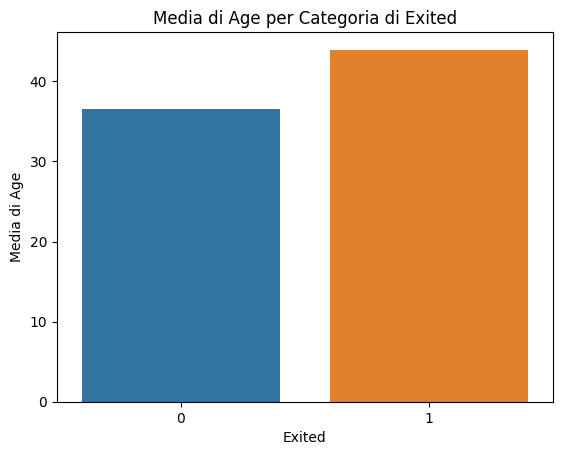

In [ ]:
# Calcolare la media di EstimatedSalary per ciascuna categoria in Exited
mean_age = train.groupby('Exited')['Age'].mean().reset_index()
print(mean_age)
# Creazione del grafico a barre
sns.barplot(x='Exited', y='Age', data=mean_age)
plt.title('Media di Age per Categoria di Exited')
plt.xlabel('Exited')
plt.ylabel('Media di Age')
plt.show()

In [ ]:
# Separare i dati in base ai gruppi
group0 = train[train['Exited'] == 0]['Age']
group1 = train[train['Exited'] == 1]['Age']

# Eseguire il test t
t_stat, p_value = stats.ttest_ind(group0, group1)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -147.2472403347262
p-value: 0.0


   Exited  CreditScore
0       0   657.590710
1       1   652.220469


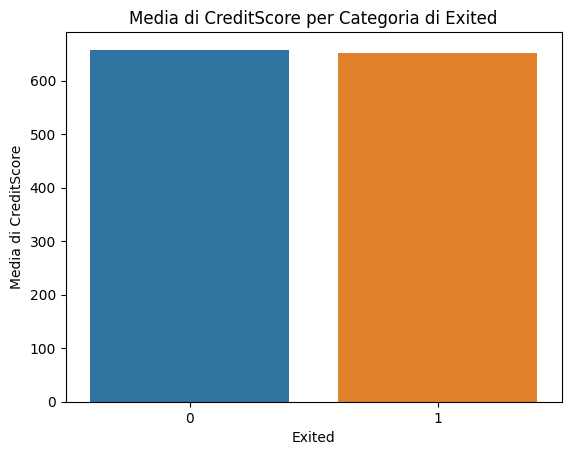

In [58]:
# Calcolare la media di EstimatedSalary per ciascuna categoria in Exited
mean_credit = train.groupby('Exited')['CreditScore'].mean().reset_index()
print(mean_credit)
# Creazione del grafico a barre
sns.barplot(x='Exited', y='CreditScore', data=mean_credit)
plt.title('Media di CreditScore per Categoria di Exited')
plt.xlabel('Exited')
plt.ylabel('Media di CreditScore')
plt.show()

In [59]:
# Separare i dati in base ai gruppi
group0 = train[train['Exited'] == 0]['CreditScore']
group1 = train[train['Exited'] == 1]['CreditScore']

# Eseguire il test t
t_stat, p_value = stats.ttest_ind(group0, group1)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 11.128116005299207
p-value: 9.373557251570065e-29


   Exited       Balance
0       0  51255.807752
1       1  71209.978085


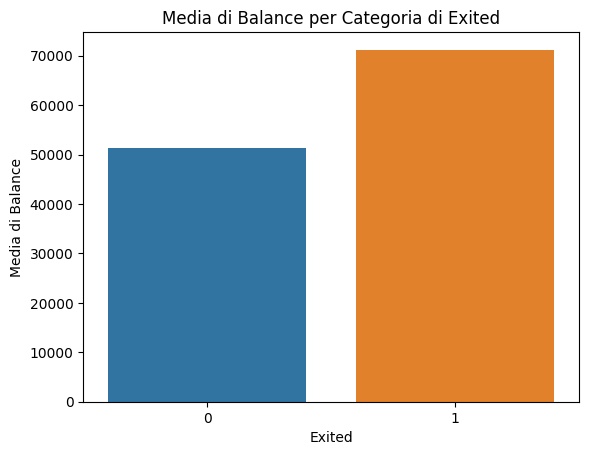

In [60]:
# Calcolare la media di EstimatedSalary per ciascuna categoria in Exited
mean_balance = train.groupby('Exited')['Balance'].mean().reset_index()
print(mean_balance)
# Creazione del grafico a barre
sns.barplot(x='Exited', y='Balance', data=mean_balance)
plt.title('Media di Balance per Categoria di Exited')
plt.xlabel('Exited')
plt.ylabel('Media di Balance')
plt.show()

In [61]:
# Separare i dati in base ai gruppi
group0 = train[train['Exited'] == 0]['Balance']
group1 = train[train['Exited'] == 1]['Balance']

# Eseguire il test t
t_stat, p_value = stats.ttest_ind(group0, group1)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -53.156202840957384
p-value: 0.0


In [62]:
# Supponiamo che il dataset sia già caricato in 'train'
# Selezionare le variabili quantitative e la variabile binaria
quantitative_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
binary_var = 'Exited'

# Creare una lista di tuple per le combinazioni da plottare
combinations = [
    ('CreditScore', 'Age'),
    ('CreditScore', 'Tenure'),
    ('CreditScore', 'Balance'),
    ('Balance', 'NumOfProducts'),
    ('NumOfProducts', 'Tenure')
]

In [63]:
quantitative = train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
categorical_features = ['Geography', 'Gender','CustomerId','Surname','HasCrCard','IsActiveMember','Tenure','NumOfProducts']

# Separare le variabili qualitative dal resto del dataset
Train_cat = train[categorical_features]
Train_other = train.drop(columns=categorical_features)

# Applicare il CatBoostEncoder alle variabili qualitative
encoder = CatBoostEncoder(cols=categorical_features)
Train_cat_encoded = encoder.fit_transform(Train_cat, train['Exited'])  # 'Exited' è la variabile target

# Concatenare le variabili codificate con il resto del dataset
train_processed = pd.concat([Train_cat_encoded, Train_other], axis=1)

Test_cat = test[categorical_features]
Test_other = test.drop(columns=categorical_features)
Test_cat_encoded = encoder.transform(Test_cat)
test_processed = pd.concat([Test_cat_encoded,Test_other], axis = 1)

In [64]:
VariablesToStandardize = ['CreditScore','Age','EstimatedSalary','Balance']

In [65]:
X = train_processed[['CreditScore', 'Tenure','Age', 
        'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography',
       'Gender','Balance','CustomerId','Surname']]
y = train_processed[['Exited']]

In [66]:
Scaler = StandardScaler()

In [67]:
X[VariablesToStandardize] = Scaler.fit_transform(X[VariablesToStandardize])

In [68]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.3,shuffle = True, random_state = 123)

In [69]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1]))  # Primo layer denso
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [70]:
history = model.fit(X, y, epochs=10, batch_size = 32, verbose=1)

Epoch 1/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8381 - loss: 0.3745
Epoch 2/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8643 - loss: 0.3260
Epoch 3/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8644 - loss: 0.3233
Epoch 4/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8649 - loss: 0.3222
Epoch 5/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8652 - loss: 0.3217
Epoch 6/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8643 - loss: 0.3232
Epoch 7/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8656 - loss: 0.3205
Epoch 8/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8651 - loss: 0.3204
Epoch 9/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8664 - loss: 0.3208
Epoch 10/10
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8654 - loss: 0.3207


In [71]:
X_test = test_processed[['CreditScore', 'Tenure','Age', 
        'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography',
       'Gender','Balance','CustomerId','Surname']]

X_test[VariablesToStandardize] = Scaler.transform(X_test[VariablesToStandardize])

In [72]:
output = model.predict(X_test)

3439/3439 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [73]:
output = np.ravel(output)

In [74]:
submissions = pd.DataFrame({'id':test_processed['id'],'Exited':output})

In [75]:
submissions.to_csv('sample_submission.csv',index = False, sep = ',')